# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Problem Definition:
To build a predictive model to estimate the price of used cars based on their attributes such as  make, model, mileage, age, condition, fuel type etc. 
This involves identifying key features that have the most significant statistical influence on car prices using techniques such as regression analysis, feature importance evaluation, and exploratory data analysis (EDA). 
The objective is to extract actionable insights that will help the used car dealership understand what factors influence car prices and provide actionable insights.

## Goals:
1. ) Identify the key attributes or inputs or drivers that significantly affect the price of used cars.

2.) Provide guidance on which types of cars are undervalued or overvalued in the market.

### 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

<h2 style="color:blue; font-size:30px;"><strong><em> List of Libraries for Data Analysis (EDA). </em></strong></h2>

In [363]:
# Data Importing and mauplation
import pandas as pd # 	Data manipulation (CSV, Excel, SQL, JSON, etc.)cCSV, Excel, SQL, JSON, Parquet, etc.Contains visualization as well. 
import numpy as np #Numerical data manipulation. Arrays, matrices

<h3 style="color:blue; font-size:25px;"><strong><em>Load Data file and "Know the data</em></strong></h3>

In [366]:
df = pd.read_csv(r'C:\Users\Prashant\Desktop\AIML\Mod_11\practical_application_II_starter\data\vehicles.csv')

In [367]:
df.head(2)
df.tail(2)
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
317132,7312532530,eugene,8500,2006.0,dodge,dakota slt,good,8 cylinders,gas,159000.0,clean,automatic,1D7HW48J46S608161,4wd,mid-size,truck,silver,or
249445,7316799537,central NJ,40995,2019.0,audi,a6,NaN,NaN,gas,10842.0,clean,automatic,WAUL2AF21KN059213,NaN,NaN,NaN,NaN,nj
29307,7309418555,humboldt county,14000,2002.0,toyota,landcruiser,excellent,8 cylinders,gas,293000.0,clean,automatic,NaN,4wd,full-size,offroad,blue,ca
672,7312311372,birmingham,5999,2013.0,mazda,sx4 se,like new,4 cylinders,gas,91000.0,clean,automatic,NaN,fwd,compact,sedan,red,al
192836,7308871634,worcester / central MA,12647,2013.0,toyota,venza le,good,NaN,other,112588.0,clean,automatic,4T3BA3BB7DU047341,NaN,NaN,other,NaN,ma


In [368]:
df.shape

(426880, 18)

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [370]:
df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

In [371]:
df['cylinders'].sample()

176435    8 cylinders
Name: cylinders, dtype: object

In [375]:
# # Extract numeric part and convert to float
# df['cylinders'] = df['cylinders'].str.extract('(\d+)').astype(float)

In [380]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [382]:
df['price'].value_counts()

price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: int64

<h4 style="color:blue; font-size:28px;"><strong><em>Handling missing values.</em></strong></h4>

<h3 style="color:blue; font-size:20px;"><strong><em>Accessing all Null values and their count</em></strong></h3>

In [386]:
df.isnull()
total_nulls = df.isnull().sum().sum()
print("Total null values:", total_nulls)

Total null values: 1215152


<h3 style="color:blue; font-size:20px;"><strong><em>Count of Rows and Coulmns with null values </em></strong></h3>

In [388]:
row_null_count = df.isnull().any(axis=1).sum() # Count of rows with at least one null
col_null_count = df.isnull().any(axis=0).sum() # Count of columns with at least one null

print(f"Number of rows with nulls: {row_null_count}")
print(f"Number of columns with nulls: {col_null_count}")


Number of rows with nulls: 392012
Number of columns with nulls: 14


<h3 style="color:blue; font-size:20px;"><strong><em>Identifying which columns have null values </em></strong></h3>

In [391]:
columns_with_nulls = df.columns[df.isnull().any()].tolist()
print("Columns with nulls:", columns_with_nulls)


Columns with nulls: ['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color']


In [393]:
# Percent of nulls per column
(df.isnull().sum() / len(df)) * 100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

<h3 style="color:blue; font-size:20px;"><strong><em>Identifying which rows have null values </em></strong></h3>

In [397]:
df[df.isnull().any(axis=1)] #locate rows with any null values
# df[df.isnull().any(axis=1)].to_dict('records')
# df.index[df.isnull().any(axis=1)].tolist()
# null_rows = df.index[df.isnull().any(axis=1)].tolist()

# print(f"Total rows with null values: {len(null_rows)}")
# print(f"Row indices with nulls: {null_rows}")




,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


<h4 style="color:blue; font-size:20px;"><strong><em>Strategy to deal with null values</em></strong></h4>

In [400]:
# Percent of nulls per column
(df.isnull().sum() / len(df)) * 100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

<h4 style="color:blue; font-size:15px;"><strong><em>Droping columns with >50% null values'Postal Code'column</em></strong></h4>

In [403]:
print(df.columns)

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


In [405]:
df_size_dropped = df.drop('size', axis =1)
print(df_size_dropped.columns)

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')


In [407]:
df =df_size_dropped

<h4 style="color:blue; font-size:15px;"><strong><em>Indentify number of rows with zero or nan values in the price column and drop them'Postal Code'column</em></strong></h4>

In [410]:
df[df['price'].isna()]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state


In [412]:
df[df['price'] == 0]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,wy
426812,7302877815,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,silver,wy
426832,7302353283,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,blue,wy
426836,7302301268,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,truck,white,wy


In [414]:
zero_price_count = (df['price'] == 0).sum()
print(f"Number of rows with price == 0: {zero_price_count}")


Number of rows with price == 0: 32895


In [416]:
df = df[df['price'] != 0] # drop rows where the price is equal to 0, use this line
df.shape

(393985, 17)

<h4 style="color:blue; font-size:15px;"><strong><em>Indentify Categorical columns, check for null values and fill null with 'unknowns'</em></strong></h4>

In [419]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object')

In [421]:
cat_nulls = df[categorical_cols].isnull().sum()
cat_nulls = cat_nulls[cat_nulls > 0]
print(cat_nulls)

manufacturer     16185
model             4701
condition       151389
cylinders       160410
fuel              2594
title_status      7734
transmission      1823
VIN             152158
drive           120254
type             85932
paint_color     117149
dtype: int64


In [422]:
#df[categorical_cols] = df[categorical_cols].fillna('unknown')
df.loc[:, categorical_cols] = df.loc[:, categorical_cols].fillna('unknown')
# df = df.copy()
# df.loc[:, categorical_cols] = df[categorical_cols].fillna('unknown')


In [424]:
df.isnull()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
426876,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
426877,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
426878,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<h4 style="color:blue; font-size:15px;"><strong><em>Indentify Numerical columns, check for null values and fill null with Medium on group-based basis or drop rows</em></strong></h4>

In [427]:
numeric_cols = df.select_dtypes(include='number').columns  # Step 1: Identify numeric columns
numeric_cols

Index(['id', 'price', 'year', 'odometer'], dtype='object')

In [430]:
num_nulls_before = df[numeric_cols].isnull().sum() # Check which of these columns have nulls
num_nulls_with_nulls = num_nulls_before[num_nulls_before > 0] #This creates a Boolean mask (True where nulls exist) and Uses that mask to filter the original Series, keeping only the rows (columns) with missing data:
print(num_nulls_with_nulls)

year        1173
odometer    2290
dtype: int64


In [432]:

#df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median()) # Fill nulls with the median value for each numeric column
df.loc[:, numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [434]:
df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
type            0
paint_color     0
state           0
dtype: int64

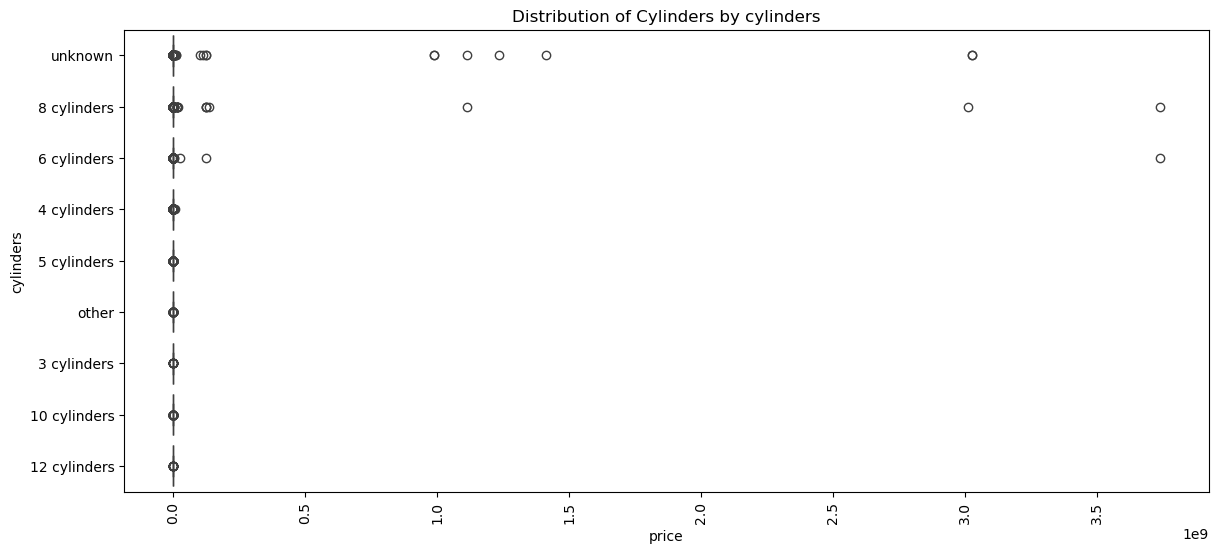

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 6))

# Create boxplot
sns.boxplot(data=df, x='price', y='cylinders')
plt.xticks(rotation=90)
plt.title('Distribution of Cylinders by cylinders')
plt.show()


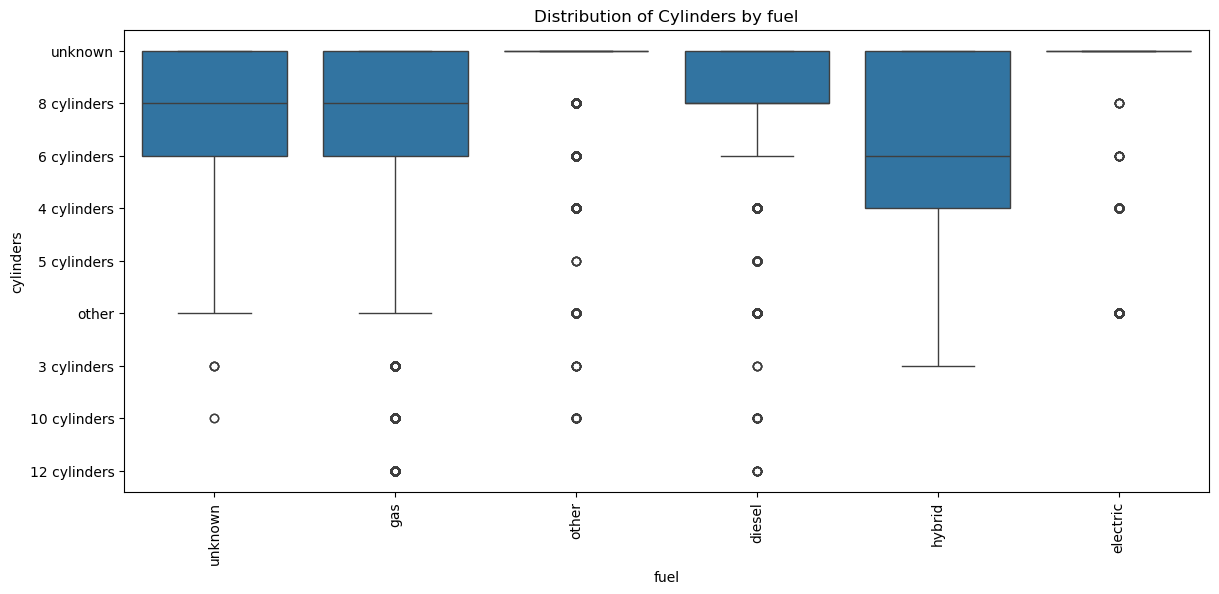

In [438]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 6))

# Create boxplot
sns.boxplot(data=df, x='fuel', y='cylinders')
plt.xticks(rotation=90)
plt.title('Distribution of Cylinders by fuel')
plt.show()


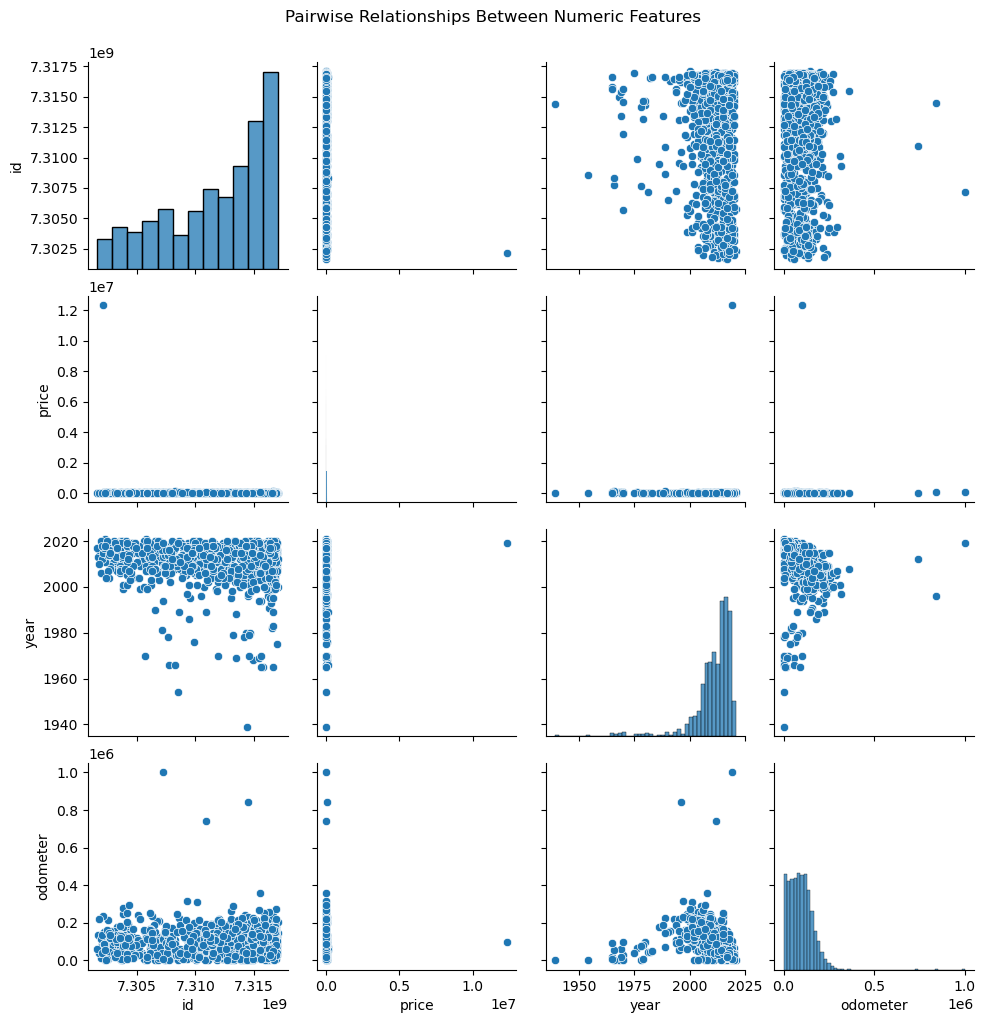

In [440]:

import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for faster plotting
sample_df = df.sample(1000, random_state=42)

# Select numeric columns only
numeric_cols = sample_df.select_dtypes(include='number')

# Create pairplot
sns.pairplot(numeric_cols)
plt.suptitle("Pairwise Relationships Between Numeric Features", y=1.02)
plt.show()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

<h4 style="color:blue; font-size:15px;"><strong><em>Box Plots and Pairwise plot to understand distribution of data </em></strong></h4>

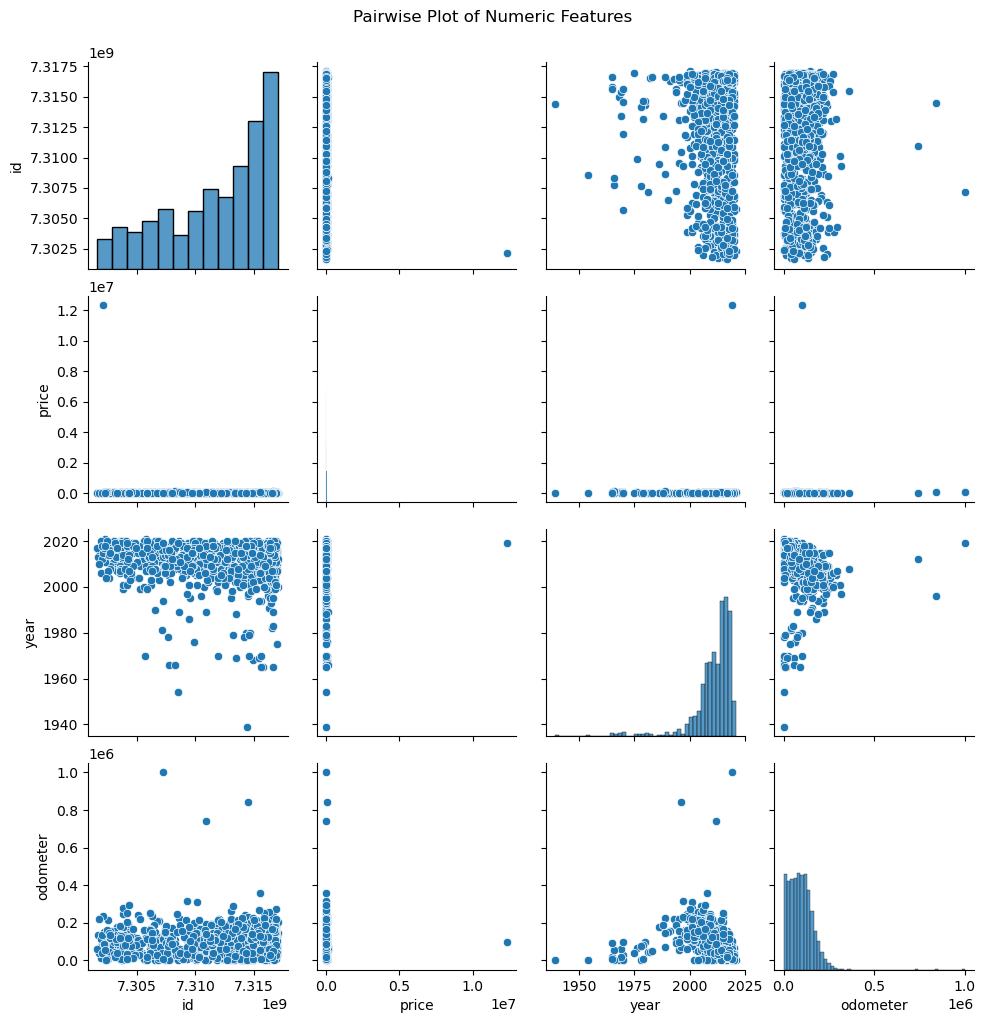

In [446]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_sample = df.sample(n=1000, random_state=42) # Sample the data to make plotting manageable

# Plot pairwise relationships
sns.pairplot(df_sample)
plt.suptitle("Pairwise Plot of Numeric Features", y=1.02)
plt.show()


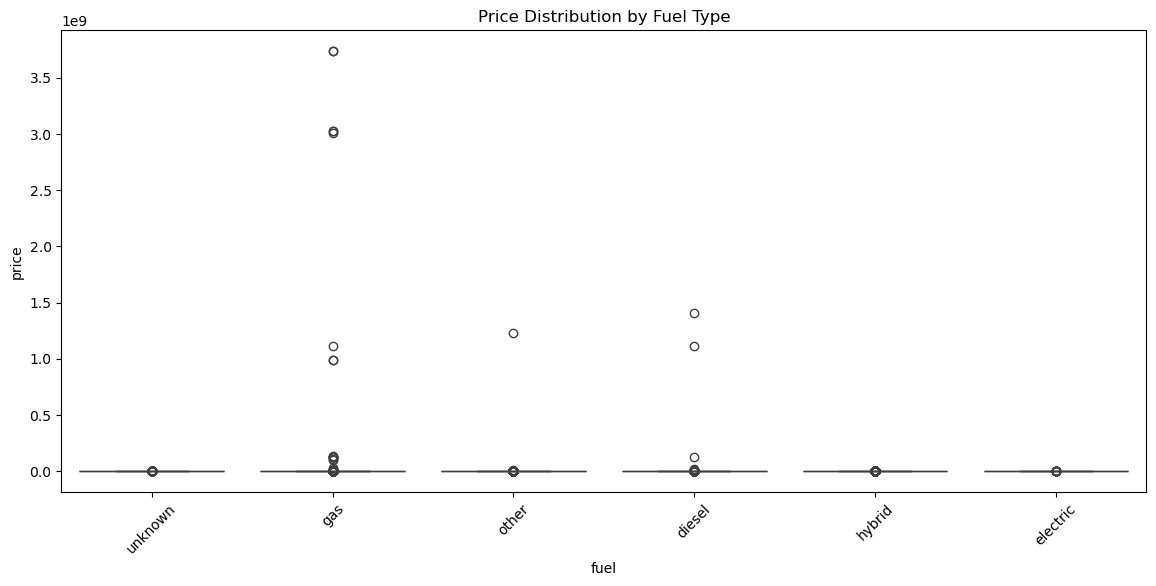

In [448]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='fuel', y='price')  # Replace 'fuel' with any categorical column
plt.xticks(rotation=45)
plt.title('Price Distribution by Fuel Type')
plt.show()

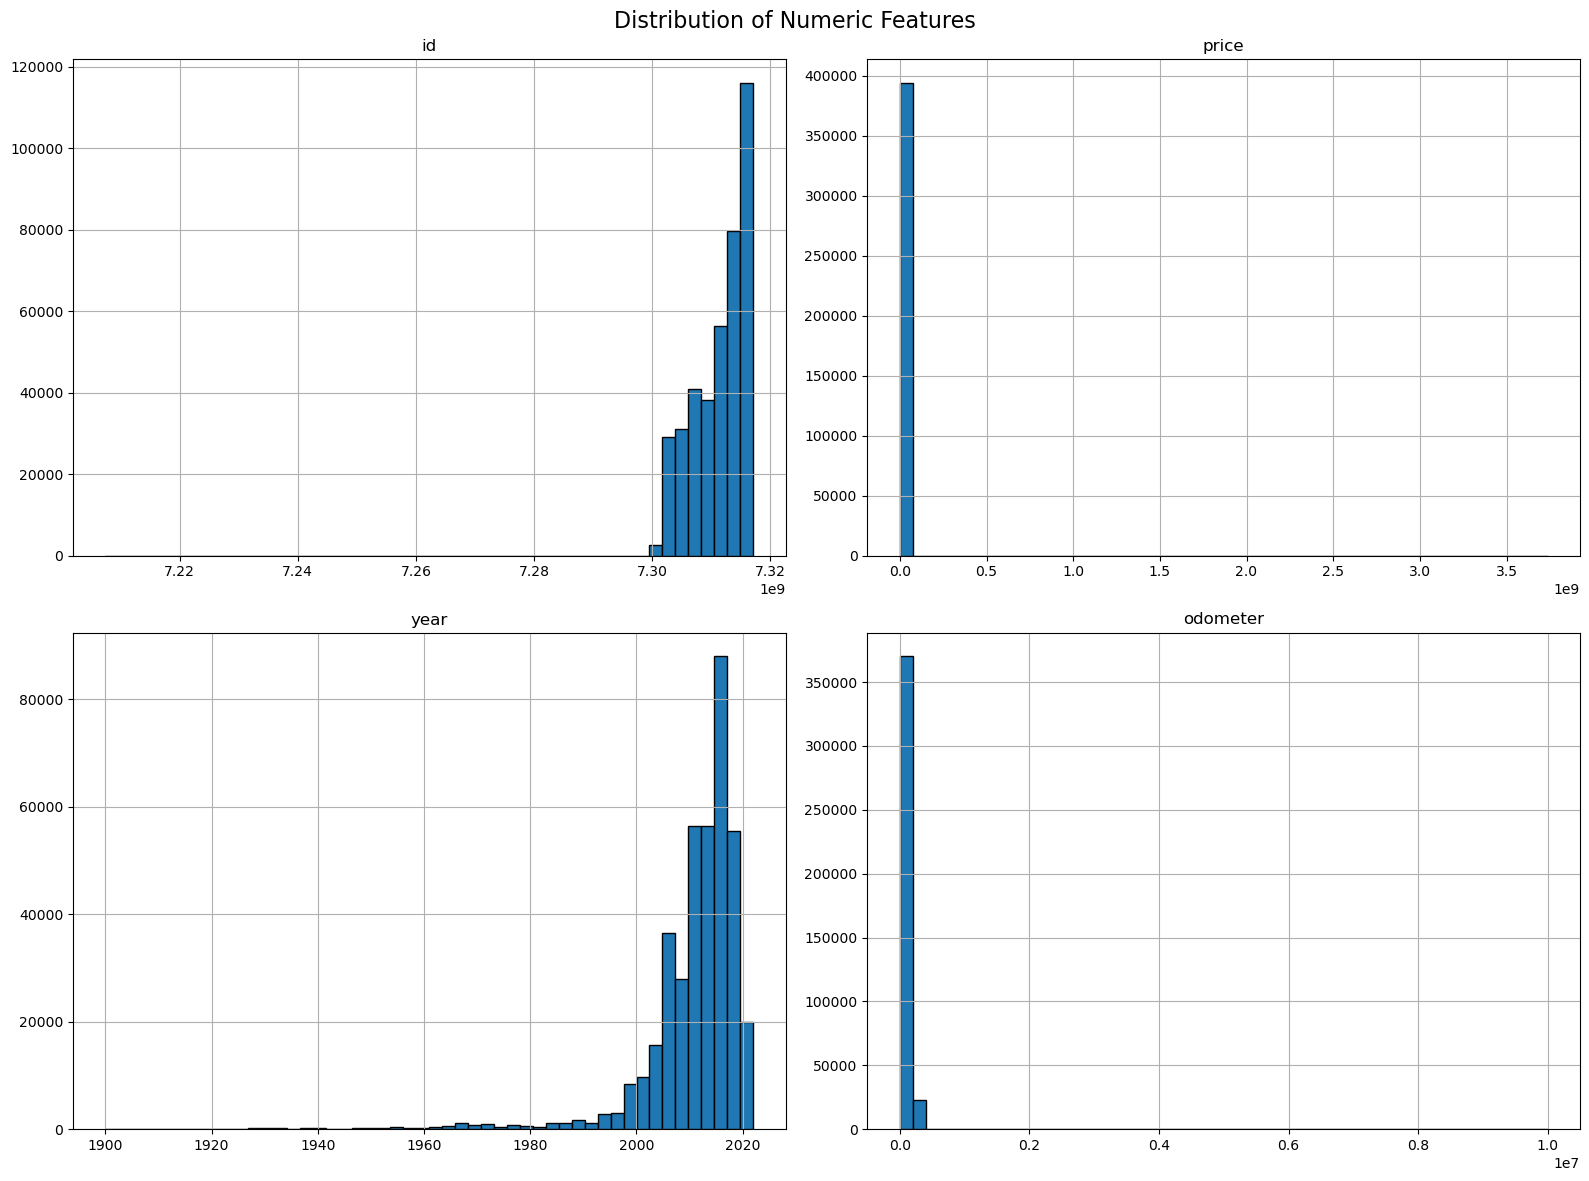

In [449]:

numeric_df = df.select_dtypes(include='number').dropna() # Select numeric columns and drop rows with nulls


numeric_df.hist(figsize=(16, 12), bins=50, edgecolor='black') # Plot histograms for each numeric column
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [450]:
# Calculate skewness for numeric columns
skew_values = numeric_df.skew().sort_values(ascending=False)

# Categorize skewness
highly_skewed = skew_values[skew_values > 1]
moderately_skewed = skew_values[(skew_values > 0.5) & (skew_values <= 1)]
symmetric = skew_values[skew_values <= 0.5]

# Print results
print("Highly Skewed:\n", highly_skewed)
print("\nModerately Skewed:\n", moderately_skewed)
print("\nSymmetric or Low Skew:\n", symmetric)


Highly Skewed:
 price       244.408014
odometer     38.841138
dtype: float64

Moderately Skewed:
 Series([], dtype: float64)

Symmetric or Low Skew:
 id     -1.382143
year   -3.489970
dtype: float64


<h4 style="color:blue; font-size:15px;"><strong><em>Since price and odometer are highly skewed using log transformation </em></strong></h4>

In [453]:
# Ensure we're working on a clean copy
df = df.copy()

In [454]:
import numpy as np

df.loc[:, 'log_price'] = np.log1p(df['price'])
df.loc[:, 'log_odometer'] = np.log1p(df['odometer'])


<h4 style="color:blue; font-size:15px;"><strong><em>Since cylinder and vehicle age are moderately skewed using standard scaling. Note year is replaced by vehicle age </em></strong></h4>

In [456]:
# Extract numeric part from 'cylinders'
df['cylinders'] = df['cylinders'].astype(str).str.extract(r'(\d+)')
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')

# Fill using median by manufacturer + fuel
df['cylinders'] = df.groupby(['manufacturer', 'fuel'])['cylinders'].transform(
    lambda x: x.fillna(x.median())
)

#  Fill remaining using median by manufacturer
df['cylinders'] = df.groupby('manufacturer')['cylinders'].transform(
    lambda x: x.fillna(x.median())
)

#  Fill any leftovers with global median
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())


In [457]:
from sklearn.preprocessing import StandardScaler

df['vehicle_age'] = 2025 - df['year']
scaler = StandardScaler()
df[['cylinders_scaled', 'vehicle_age_scaled']] = scaler.fit_transform(df[['cylinders', 'vehicle_age']])


<h4 style="color:blue; font-size:15px;"><strong><em>Since id is of no use in predicting pricing it is dropped </em></strong></h4>

In [459]:
print(df.columns.tolist())


['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'type', 'paint_color', 'state', 'log_price', 'log_odometer', 'vehicle_age', 'cylinders_scaled', 'vehicle_age_scaled']


In [460]:
df = df.drop('id', axis =1)
# df.drop('id', axis=1, inplace=True)

In [461]:
print(df.columns.tolist())

['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'type', 'paint_color', 'state', 'log_price', 'log_odometer', 'vehicle_age', 'cylinders_scaled', 'vehicle_age_scaled']


<h4 style="color:blue; font-size:15px;"><Dropping id as it is not useful for this analysis </em></strong></h4>

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [464]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [465]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'type', 'paint_color', 'state', 'log_price', 'log_odometer',
       'vehicle_age', 'cylinders_scaled', 'vehicle_age_scaled'],
      dtype='object')

<h4 style="color:blue; font-size:15px;"><strong><em>Identify key inputs based on how well they are correlated to the output </em></strong></h4>

In [467]:
correlation_matrix = df.corr(numeric_only=True)

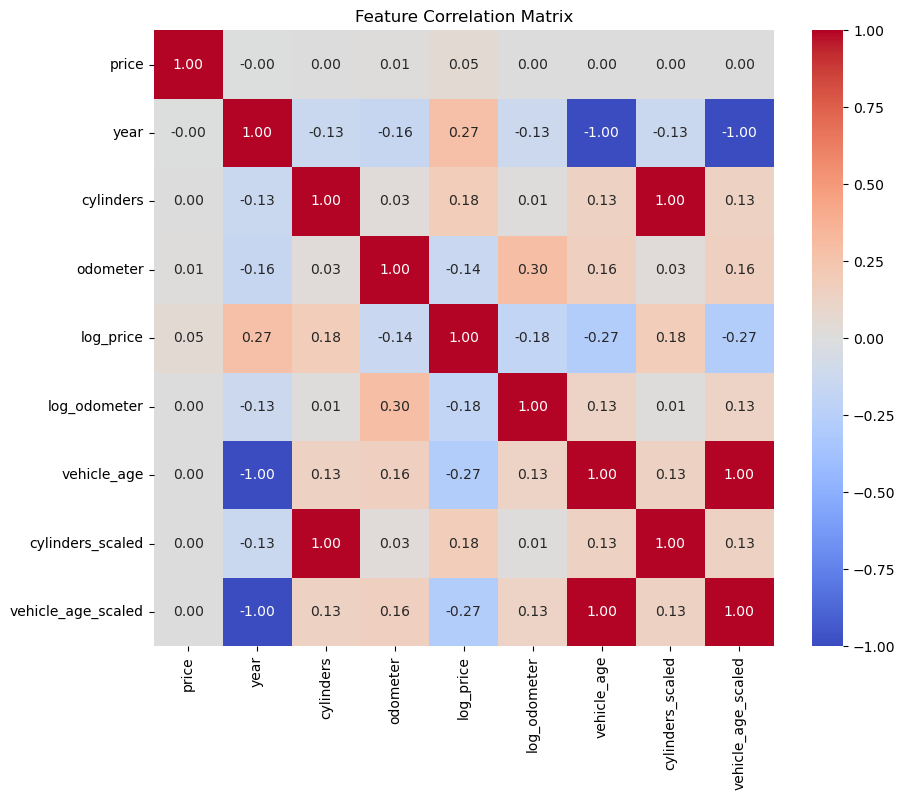

In [468]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


<h4 style="color:blue; font-size:15px;"><strong><em>Vehical_age_scaled, log_Cylinder and log_price are highly correlated </em></strong></h4>

In [470]:
# Absolute correlations above 0.8 (excluding self-correlation)
high_corr = correlation_matrix.abs().unstack()
high_corr = high_corr[high_corr < 1.0]  # exclude self-correlations
high_corr = high_corr[high_corr > 0.8].sort_values(ascending=False)

# Drop duplicate pairs (A-B and B-A)
high_corr = high_corr[~high_corr.duplicated()]

print(high_corr)


vehicle_age  vehicle_age_scaled    1.0
year         vehicle_age           1.0
cylinders    cylinders_scaled      1.0
dtype: float64


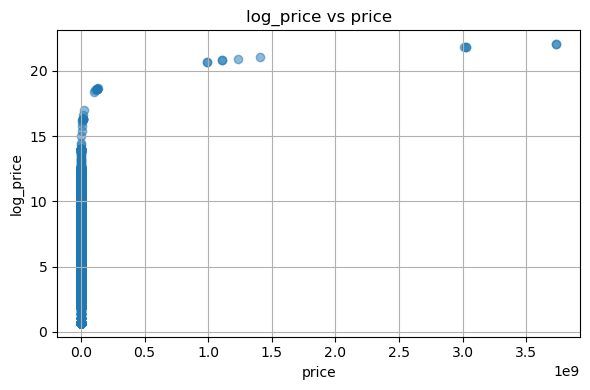

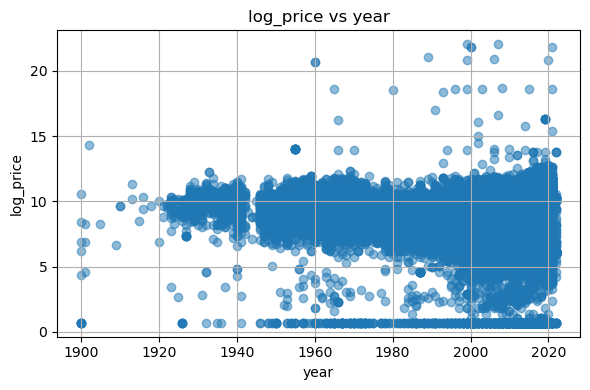

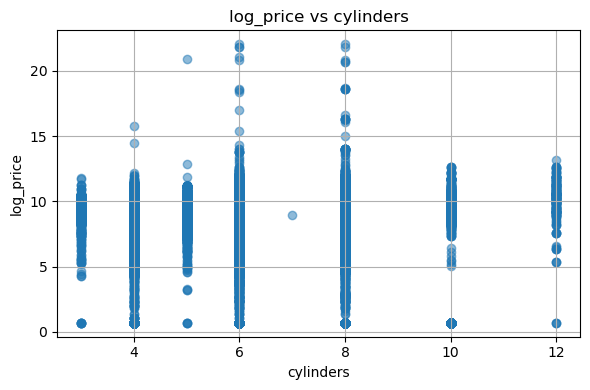

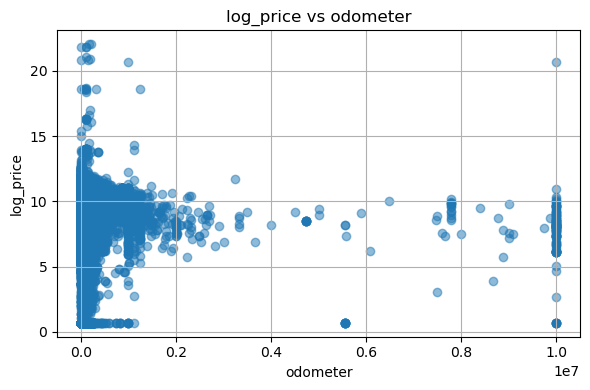

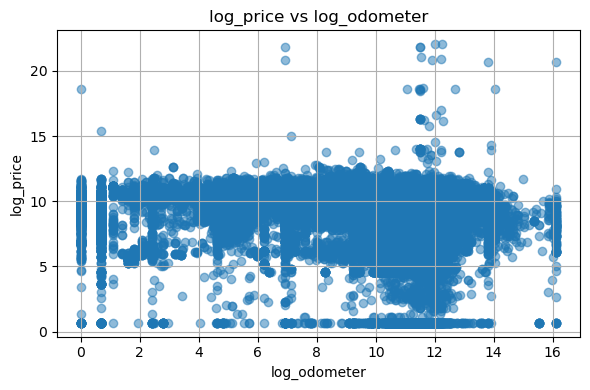

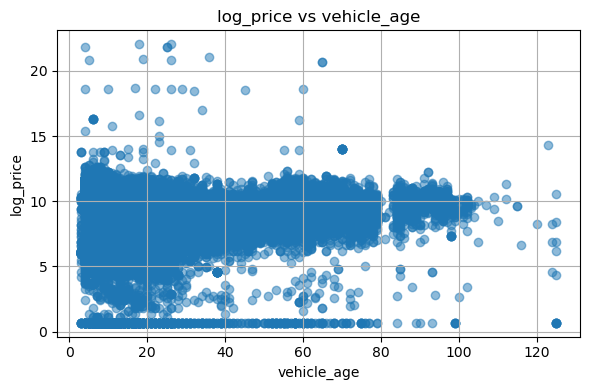

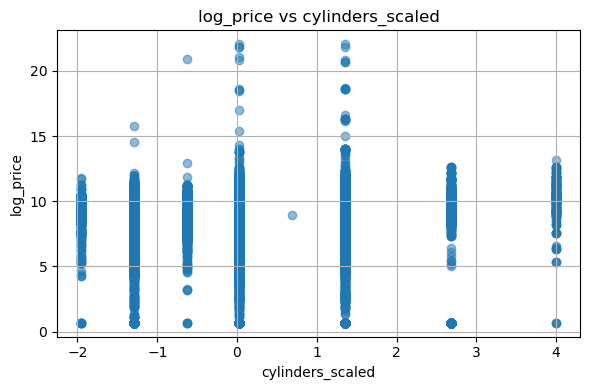

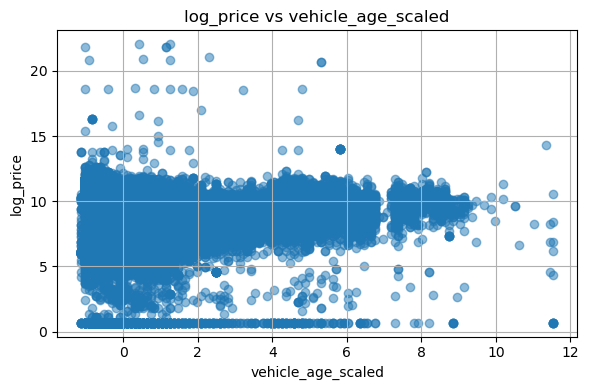

In [471]:
import matplotlib.pyplot as plt

# Set your target variable
target = 'log_price'

# Filter numeric features (excluding 'price')
features = df.select_dtypes(include='number').columns.drop(target)

# Plot each feature against price
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{target} vs {feature}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<h4 style="color:blue; font-size:15px;"><strong><em>Based on the correlation analyis abovefinalize the numeric columns and select all categorical columns as features</em></strong></h4>

In [473]:
features = ['log_odometer', 'cylinders_scaled', 'vehicle_age_scaled', 'manufacturer', 'fuel', 'type', 'transmission', 'drive']
df = df.dropna(subset=features)
# Define X and y
X = df[features]
y = df['log_price']

In [474]:
categorical_features = ['manufacturer','fuel', 'type', 'transmission', 'drive']
numeric_features = ['log_odometer', 'cylinders_scaled', 'vehicle_age_scaled']
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

<h4 style="color:blue; font-size:15px;"><strong><em>Run models: LinearRegression, Ridge Regression, Lasso Regression, RandoFores and GDRas shown below </em></strong></h4>

In [476]:
#df_sampled = df.sample(10000, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Models - Multiple models used 
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1, max_iter=100000,tol=0.01),
    'RandomForest': RandomForestRegressor(n_estimators=20,max_depth=10, random_state=42,n_jobs=-1),
    'GBR': GradientBoostingRegressor(n_estimators=100)
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-Validation Evaluation
results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    results[name] = {
        'RMSE (mean)': -scores.mean(),
        'RMSE (std)': scores.std()
    }
        # Fit the final model on all training data
    pipe.fit(X_train, y_train)
    
    # Store the fitted model for later use
    fitted_models[name] = pipe
# Show results
results_df = pd.DataFrame(results).T
print(results_df)

                  RMSE (mean)  RMSE (std)
LinearRegression     1.081249    0.007502
Ridge                1.081256    0.007495
Lasso                1.147899    0.006336
RandomForest         0.923676    0.004827
GBR                  0.981081    0.005526


<h4 style="color:blue; font-size:15px;"><strong><em>Extract model Equation, Coefficient and key factors </em></strong></h4>

In [479]:
for name, model in fitted_models.items():
    print(f"\n{name} Regression Equation:")

    # Get the regressor from the pipeline
    regressor = model.named_steps['regressor']

    # Check if the model supports coefficients (i.e., it's a linear model)
    if hasattr(regressor, 'coef_') and hasattr(regressor, 'intercept_'):
        
        # Get feature names after preprocessing (including one-hot encoding)
        preprocessor = model.named_steps['preprocessor']
        onehot = preprocessor.named_transformers_['cat']
        encoded_cat_features = onehot.get_feature_names_out(categorical_features)
        all_features = numeric_features + list(encoded_cat_features)

        # Print the full equation
        terms = [
            f"{coef:.4f}*{feature}"
            for coef, feature in zip(regressor.coef_, all_features)
            if abs(coef) > 1e-6  # filter out near-zero coefficients
        ]
        equation = f"price = {regressor.intercept_:.2f} + " + " + ".join(terms)
        print(equation)
    
    else:
        print("This model does not support a closed-form equation (non-linear model).")



LinearRegression Regression Equation:
price = 10.76 + -0.0923*log_odometer + 0.1260*cylinders_scaled + -0.2999*vehicle_age_scaled + 0.0624*manufacturer_acura + 0.4914*manufacturer_alfa-romeo + 0.4114*manufacturer_aston-martin + 0.3016*manufacturer_audi + 0.0544*manufacturer_bmw + -0.0874*manufacturer_buick + 0.0496*manufacturer_cadillac + -0.0664*manufacturer_chevrolet + -0.2964*manufacturer_chrysler + 0.9518*manufacturer_datsun + -0.3033*manufacturer_dodge + 1.5435*manufacturer_ferrari + -0.3661*manufacturer_fiat + 0.0137*manufacturer_ford + 0.0333*manufacturer_gmc + -0.4199*manufacturer_harley-davidson + -0.0702*manufacturer_honda + -0.0995*manufacturer_hyundai + 0.1070*manufacturer_infiniti + 0.1536*manufacturer_jaguar + -0.0052*manufacturer_jeep + -0.1083*manufacturer_kia + -0.1389*manufacturer_land rover + 0.2343*manufacturer_lexus + 0.1469*manufacturer_lincoln + -0.1757*manufacturer_mazda + 0.1009*manufacturer_mercedes-benz + -0.6215*manufacturer_mercury + 0.0788*manufacturer_mi

In [480]:
for name, model in fitted_models.items():
    print(f"\n{name}:")

    regressor = model.named_steps['regressor']

    if hasattr(regressor, 'feature_importances_'):
        # Get feature names after preprocessing
        onehot = model.named_steps['preprocessor'].named_transformers_['cat']
        encoded_cat_features = onehot.get_feature_names_out(categorical_features)
        all_feature_names = numeric_features + list(encoded_cat_features)

        # Feature importances
        importances = pd.Series(regressor.feature_importances_, index=all_feature_names)
        print("Top 10 Important Features:")
        print(importances.sort_values(ascending=False).head(10))
    else:
        print("This model does not support feature importances.")



LinearRegression:
This model does not support feature importances.

Ridge:
This model does not support feature importances.

Lasso:
This model does not support feature importances.

RandomForest:
Top 10 Important Features:
vehicle_age_scaled      0.431421
log_odometer            0.177331
cylinders_scaled        0.130084
fuel_diesel             0.050274
type_pickup             0.018029
drive_4wd               0.016078
type_sedan              0.015176
type_unknown            0.015034
transmission_other      0.013792
manufacturer_unknown    0.012206
dtype: float64

GBR:
Top 10 Important Features:
vehicle_age_scaled    0.465954
log_odometer          0.164033
cylinders_scaled      0.144345
fuel_diesel           0.052408
type_pickup           0.026358
type_unknown          0.019577
fuel_gas              0.016987
drive_4wd             0.016213
type_sedan            0.015348
drive_fwd             0.013000
dtype: float64


In [481]:
for name, model in fitted_models.items():
    print(f"\n{name}:")

    # Extract the final regressor from the pipeline
    regressor = model.named_steps['regressor']
    
    # Only proceed if it has coef_ and intercept_
    if hasattr(regressor, 'coef_') and hasattr(regressor, 'intercept_'):
        # Get feature names from one-hot encoding
        onehot = model.named_steps['preprocessor'].named_transformers_['cat']
        encoded_cat_features = onehot.get_feature_names_out(categorical_features)
        all_feature_names = numeric_features + list(encoded_cat_features)

        # Coefficients
        coef_series = pd.Series(regressor.coef_, index=all_feature_names)
        
        print(f"Intercept: {regressor.intercept_:.2f}")
        print("Top 10 Features by Absolute Coefficient:")
        print(coef_series.abs().sort_values(ascending=False).head(10))
    else:
        print("This model does not have linear coefficients.")



LinearRegression:
Intercept: 10.76
Top 10 Features by Absolute Coefficient:
manufacturer_morgan        2.160091
manufacturer_ferrari       1.543470
manufacturer_datsun        0.951816
manufacturer_tesla         0.651137
manufacturer_porsche       0.639512
manufacturer_mercury       0.621492
manufacturer_saturn        0.589865
type_bus                   0.501467
manufacturer_alfa-romeo    0.491423
fuel_diesel                0.420787
dtype: float64

Ridge:
Intercept: 10.81
Top 10 Features by Absolute Coefficient:
manufacturer_ferrari            1.497569
manufacturer_datsun             0.880217
manufacturer_mercury            0.670043
manufacturer_saturn             0.637391
manufacturer_tesla              0.595873
manufacturer_porsche            0.589626
type_bus                        0.509117
manufacturer_alfa-romeo         0.439870
manufacturer_harley-davidson    0.433641
fuel_diesel                     0.420222
dtype: float64

Lasso:
Intercept: 10.34
Top 10 Features by Absolute Coef

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Results are as shown below 

                  RMSE (mean)  RMSE (std)
LinearRegression     1.081249    0.007502
Ridge                1.081256    0.007495
Lasso                1.147899    0.006336
RandomForest         0.923676    0.004827
GBR                  0.981027    0.0

Random forest performed the best in case of RMSE 
Linear model showed low RMSE as well may be due to pre-selction of features based on correlation matrix and heatmap to identify possible key features. 
Lasso's model did not converge that is reason the  max_iteration was changed from 10,000 to 100,000
05580

Summary based on each model is as shown below 
1.) Linear regression: (RMSE =0.007502)
Equation: please the code output
Key features: Top 3 key features are:
manufacturer_morgan        2.160091
manufacturer_ferrari       1.543470
manufacturer_datsun        0.951812
1.) Ridge regression: (RMSE =0.007495)
Equation: please the code output
Key features: Top 3 key features are:
manufacturer_ferrari            1.497569
manufacturer_datsun             0.880217
manufacturer_mercury            0.67
3.) Lasso regression: (RMSE = 0.006336)
Equation: price = 10.34 + -0.0844*log_odometer + 0.1574*cylinders_scaled + -0.2404*vehicle_age_scaled
Key features: Top 3 key features are:
vehicle_age_scaled    0.240411
cylinders_scaled      0.157411
log_odometer          0.0844
All others are forced to zero
4.) RandomForest regression: (RMSE = 0.004827)
Equation:See the code output 
Key features: Top 3 key features are:
vehicle_age_scaled    0.240411
cylinders_scaled      0.157411
log_odometer          0.084429
All others are forced to zero
5.) Gradient Boosting Regressor Model: RMSE 0.005580
Equation:not vaiable as it is a non-linear ensemble of decision trees42
Key features: Top 3 key features are:
vehicle_age_scaled    0.466033
log_odometer          0.163960
cylinders_scaled      0.144242
All others arNOT e forced to 
Based on the best model i.e RandomForest the key features are vehicle_age_scaled,cylinders_scaled and log_odometer. W)
zero29004316

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Key Insights: 
1.) Vehicle Age: Newer cars command higher prices
2.) Odometer: Lower mileage is valued more
3.) Manufacturer: Brands matter significantly (e.g., Toyota, BMW)

* Random Forest performed best (lowest RMSE, highest robustness)
* Model related:
  1.) Cross-validated for reliability
  2.) Random Forest had the least RMSE
  3.) Lasso faced convergence issues due to complexity of categorical features
Value for the Business:
•	Use model insights to focus inventory acquisition on high-value vehicle profiles
•	Support smarter pricing with data-backed feature importance
